# Practice Project -7

# Big Data Mart Sales Problem

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
bmart_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
bmart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In train data we have 8523 rows and 12 columns
Item_Outlet_Sales is our target variable

In [3]:
bmart_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
bmart_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
bmart_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
bmart_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

First we will train our Train data ie  Bigmart_train then we will proceed to Bigmart_test data

In [6]:
bmart_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
bmart_train.shape

(8523, 12)

In [8]:
bmart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
bmart_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Checking null Values:

In [10]:
bmart_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

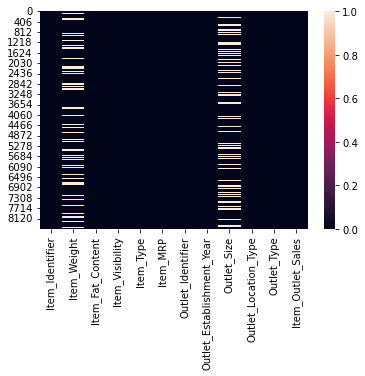

In [11]:
sns.heatmap(bmart_train.isnull())

As we can see there are null values in Item_weight and outlet_size column

# Removing Null Values:

In [12]:
bmart_train['Item_Weight'] = bmart_train['Item_Weight'].fillna((bmart_train['Item_Weight'].mean()))

In [13]:
# for categorical columns using Simple Imputer for filling missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

bmart_train['Outlet_Size']= imp.fit_transform(bmart_train['Outlet_Size'].values.reshape(-1,1))

bmart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:>

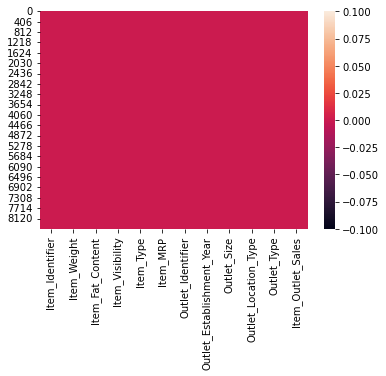

In [14]:
sns.heatmap(bmart_train.isnull())

All null values are removed

# Checking Duplicates:

In [15]:
bmart_train.duplicated().sum()

0

no duplicates

# Checking unique values

In [16]:
for i in bmart_train:
    print(i)
    print(bmart_train[i].value_counts())
    print("unique values are",bmart_train[i].nunique())
    print("\n")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
unique values are 1559


Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
unique values are 416


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
unique values are 5


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
unique values are 7880


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
House

We can see from above all unique values and count of those values in each column. Also data in item_fat_content is not properly named.

In [17]:
bmart_train['Item_Fat_Content'] = bmart_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})

In [18]:
bmart_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item identifier has been given the unique value however we can see that the 1st 2 letter are the one which identify the item.

We will keep only the 1st 2 letter from this strinng using the below command

In [19]:
bmart_train['Item_Identifier'] = bmart_train['Item_Identifier'].astype(str).str[:2]

In [20]:
bmart_train['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [21]:
bmart_train[bmart_train['Item_Outlet_Sales']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


No zero values in sales

# Using Label Encoder:

In [22]:
bmart_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
bmart_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [24]:
le = LabelEncoder()

In [25]:
list1 =['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    bmart_train[val]= le.fit_transform(bmart_train[val].astype(str))

bmart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,2,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# EDA

# Descriptive Statistics:

In [26]:
bmart_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,8523.0,1.093864,0.522090,0.000,1.000000,1.000000,1.000000,2.000000
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Fat_Content,8523.0,0.352693,0.477836,0.000,0.000000,0.000000,1.000000,1.000000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,8523.0,4.722281,2.837201,0.000,2.000000,5.000000,7.000000,9.000000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000


# Visualization of data

In [27]:
# Set the global default size of matplotlib figures using runtime configuration
plt.rc('figure', figsize=(15, 10))            

# Size of matplotlib figures that contain subplots 
figsize_subplots = (20, 20)

# Size of matplotlib histogram bins
bin_size = 10

Text(0.5, 1.0, 'Item_Outlet_Sales')

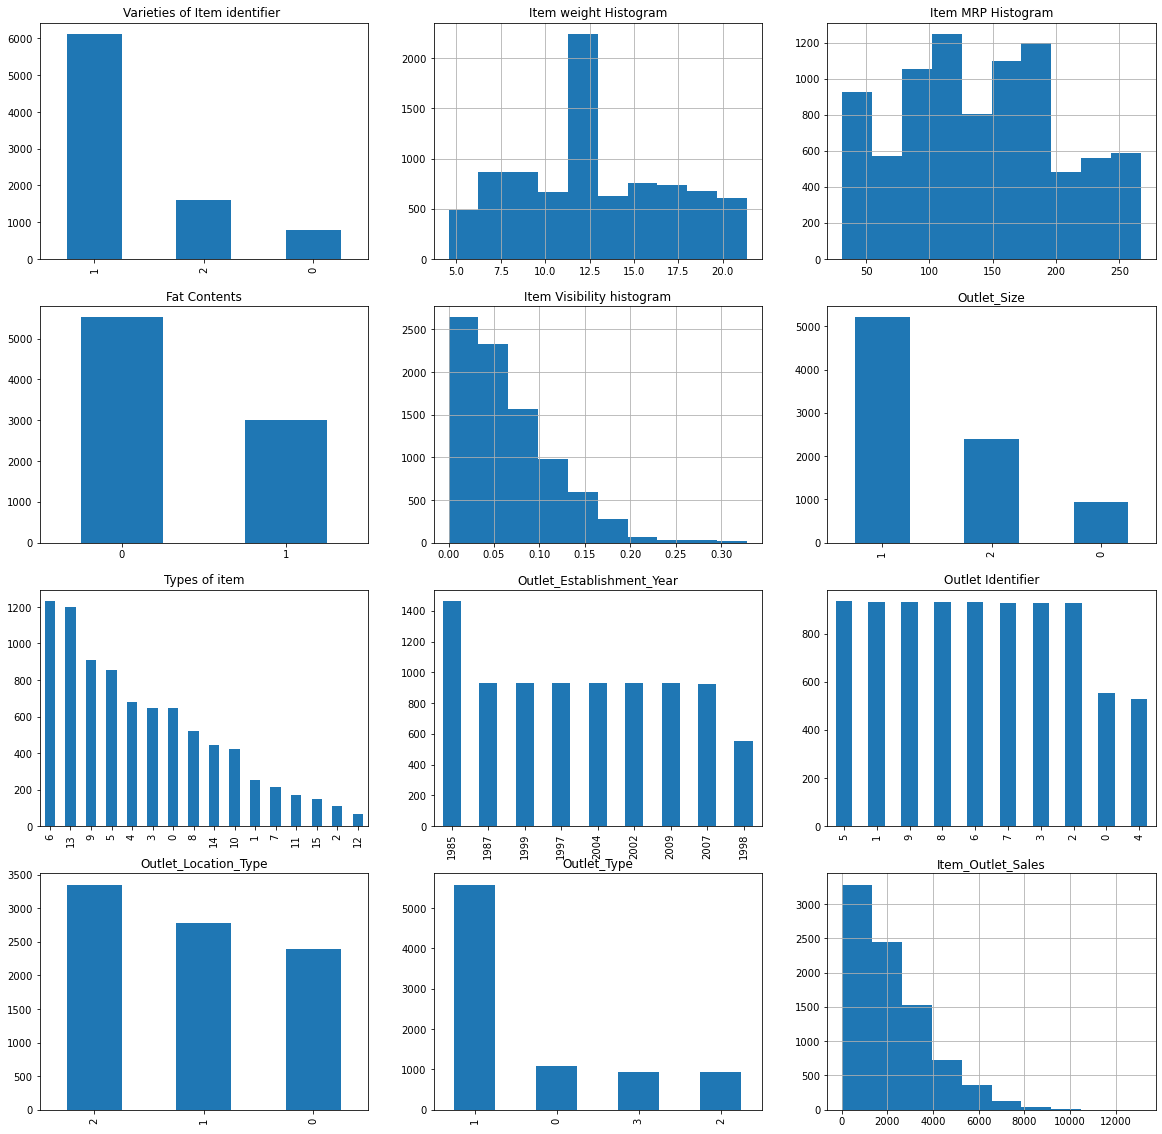

In [28]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_subplots) 
fig_dims = (4, 3)

# Plotting item_identfier
plt.subplot2grid(fig_dims, (0, 0))
bmart_train['Item_Identifier'].value_counts().plot(kind='bar', 
                                         title='Varieties of Item identifier ')

# Plot weight of item
plt.subplot2grid(fig_dims, (0,1))
bmart_train['Item_Weight'].hist()
plt.title("Item weight Histogram")


# Plottting fat content
plt.subplot2grid(fig_dims, (1, 0))
bmart_train['Item_Fat_Content'].value_counts().plot(kind='bar', title='Fat Contents')
plt.xticks(rotation=0)

# Plotting item visiblity
plt.subplot2grid(fig_dims, (1,1))
bmart_train['Item_Visibility'].hist()
plt.title('Item Visibility histogram')


# Plotting Item_Type
plt.subplot2grid(fig_dims, (2,0))
bmart_train['Item_Type'].value_counts().plot(kind='bar', title='Types of item')


# Plot mrp of item
plt.subplot2grid(fig_dims, (0,2))
bmart_train['Item_MRP'].hist()
plt.title("Item MRP Histogram")


# plotting Outlet_Identifier
plt.subplot2grid(fig_dims, (2, 2))
bmart_train['Outlet_Identifier'].value_counts().plot(kind='bar', title='Outlet Identifier')

# plotting Outlet_Establishment_Year
plt.subplot2grid(fig_dims, (2,1))
bmart_train['Outlet_Establishment_Year'].value_counts().plot(kind='bar', title='Outlet_Establishment_Year')


# plotting Outlet_Size
plt.subplot2grid(fig_dims, (1, 2))
bmart_train['Outlet_Size'].value_counts().plot(kind='bar', title='Outlet_Size')


#plotting Outlet_Location_Type
plt.subplot2grid(fig_dims, (3, 0))
bmart_train['Outlet_Location_Type'].value_counts().plot(kind='bar', title='Outlet_Location_Type')


#plotting Outlet_Type
plt.subplot2grid(fig_dims, (3, 1))
bmart_train['Outlet_Type'].value_counts().plot(kind='bar', title='Outlet_Type')


#plotting Item_Outlet_Sales
plt.subplot2grid(fig_dims, (3,2))
bmart_train['Item_Outlet_Sales'].hist()
plt.title("Item_Outlet_Sales")

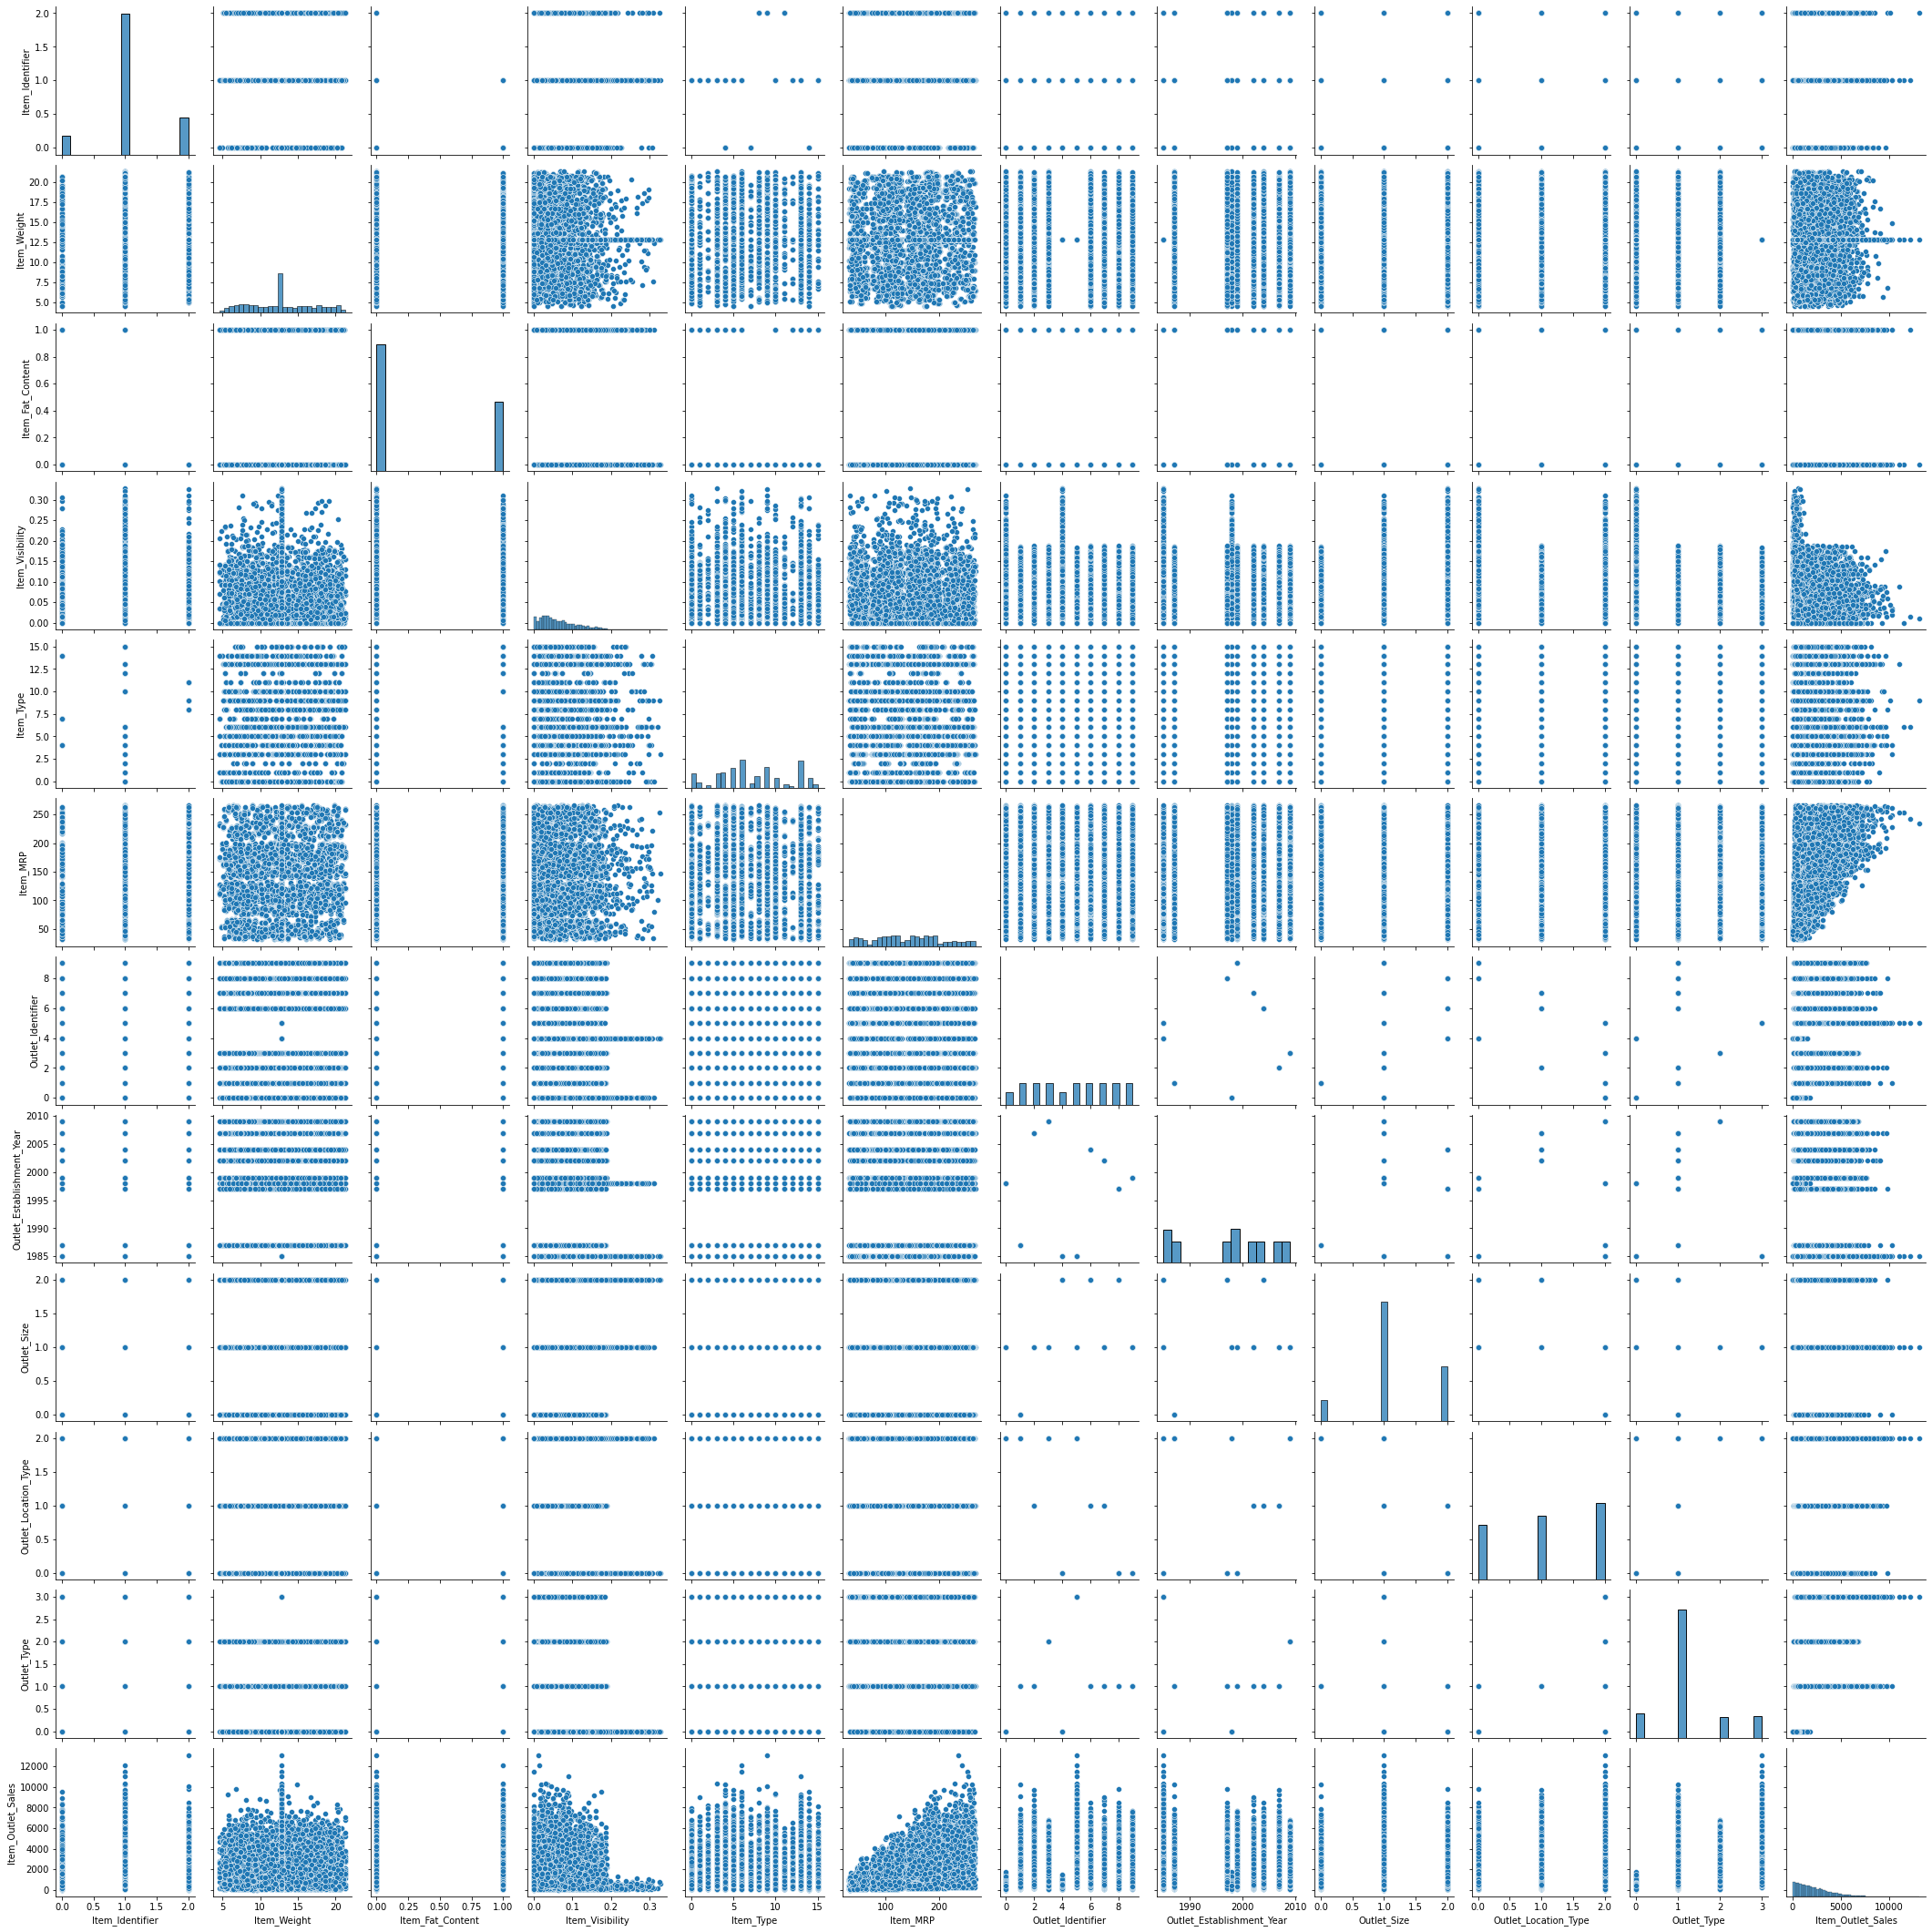

In [29]:
sns.pairplot(data=bmart_train)

Lets visualize the pairplot subplots indivisually

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

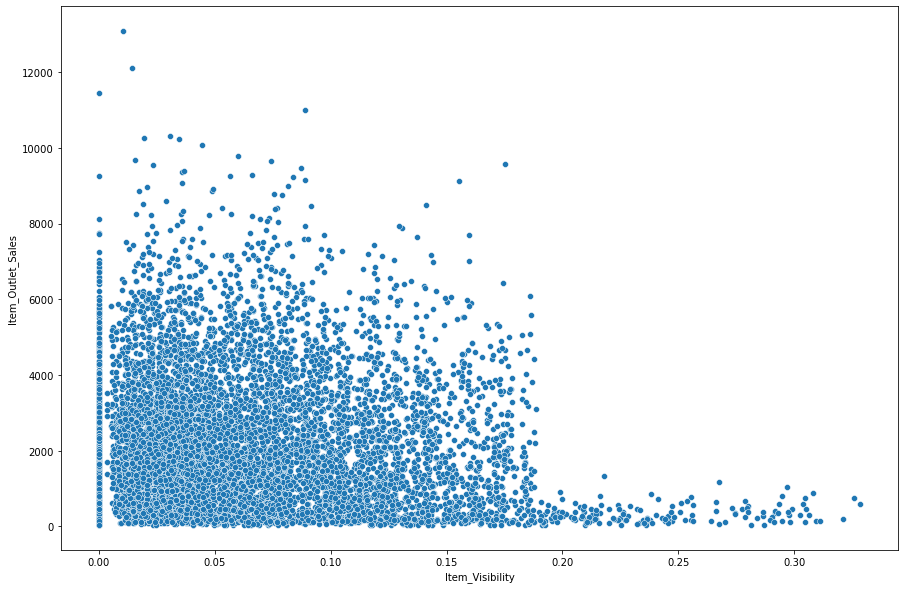

In [30]:
sns.scatterplot(bmart_train["Item_Visibility"], bmart_train["Item_Outlet_Sales"])

items which have less visiblity have more sales and vice versa

<BarContainer object of 8523 artists>

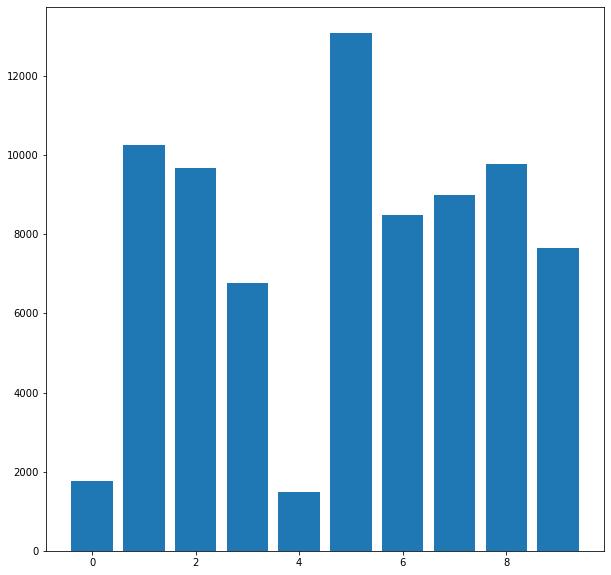

In [31]:
plt.figure(figsize=(10,10))
plt.bar(bmart_train["Outlet_Identifier"],bmart_train["Item_Outlet_Sales"], width = 0.8)

outlet identifier no 5 ie OUT027 has maximum sales

<BarContainer object of 8523 artists>

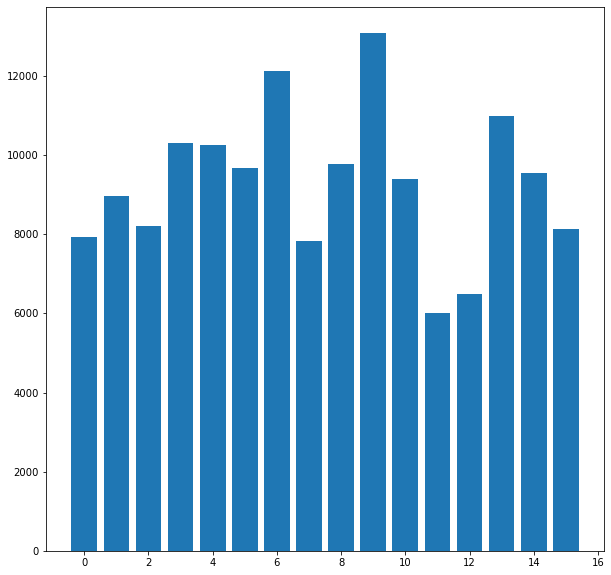

In [32]:
plt.figure(figsize=(10,10))
plt.bar(bmart_train["Item_Type"],bmart_train["Item_Outlet_Sales"], width = 0.8)

Fruits and vegetables i.e no 9 has maximum sales

<BarContainer object of 8523 artists>

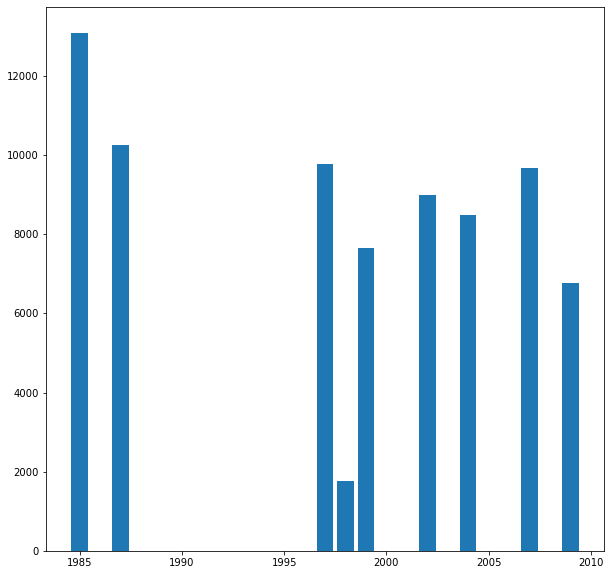

In [33]:
plt.figure(figsize=(10,10))
plt.bar(bmart_train["Outlet_Establishment_Year"],bmart_train["Item_Outlet_Sales"], width = 0.8)

sales were highest in 1985 and decereased coming to the year 2007-2009

<BarContainer object of 8523 artists>

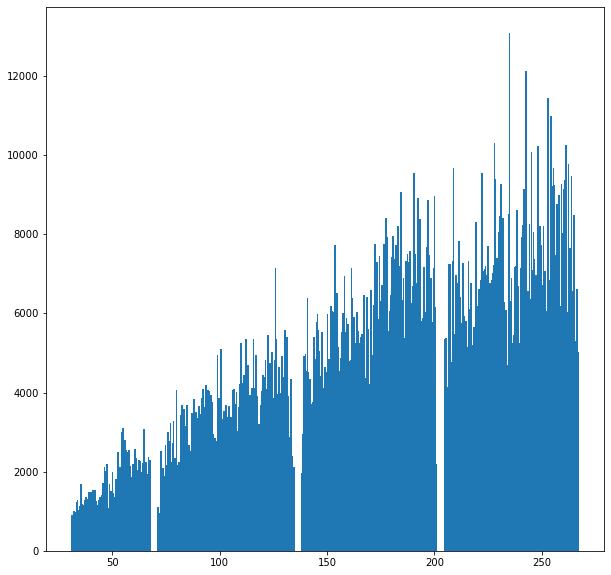

In [34]:
plt.figure(figsize=(10,10))
plt.bar(bmart_train["Item_MRP"],bmart_train["Item_Outlet_Sales"], width = 0.8)

item with mrp between 210-260 have highest sales

<BarContainer object of 8523 artists>

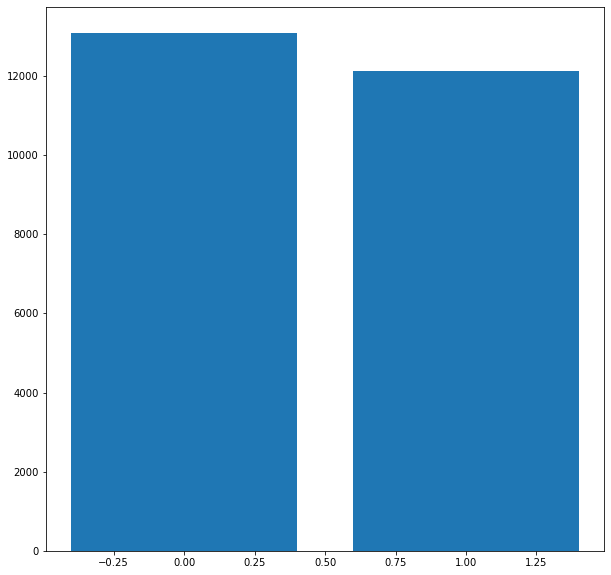

In [35]:
plt.figure(figsize=(10,10))
plt.bar(bmart_train["Item_Fat_Content"],bmart_train["Item_Outlet_Sales"], width = 0.8)

low fat items have highest sales

<BarContainer object of 8523 artists>

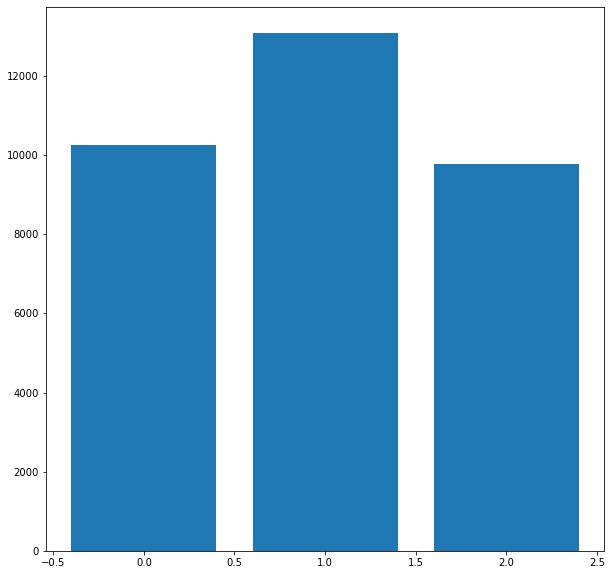

In [36]:
plt.figure(figsize=(10,10))
plt.bar(bmart_train["Outlet_Size"],bmart_train["Item_Outlet_Sales"], width = 0.8)

outlets having medium size have maximum sales

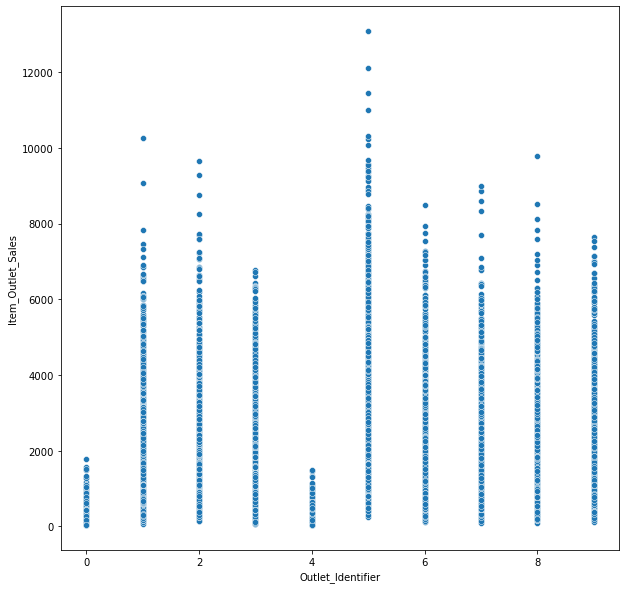

In [37]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = bmart_train)
plt.show()

outlet identifier of no 5 ie. OUT027 has highest no of sales

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

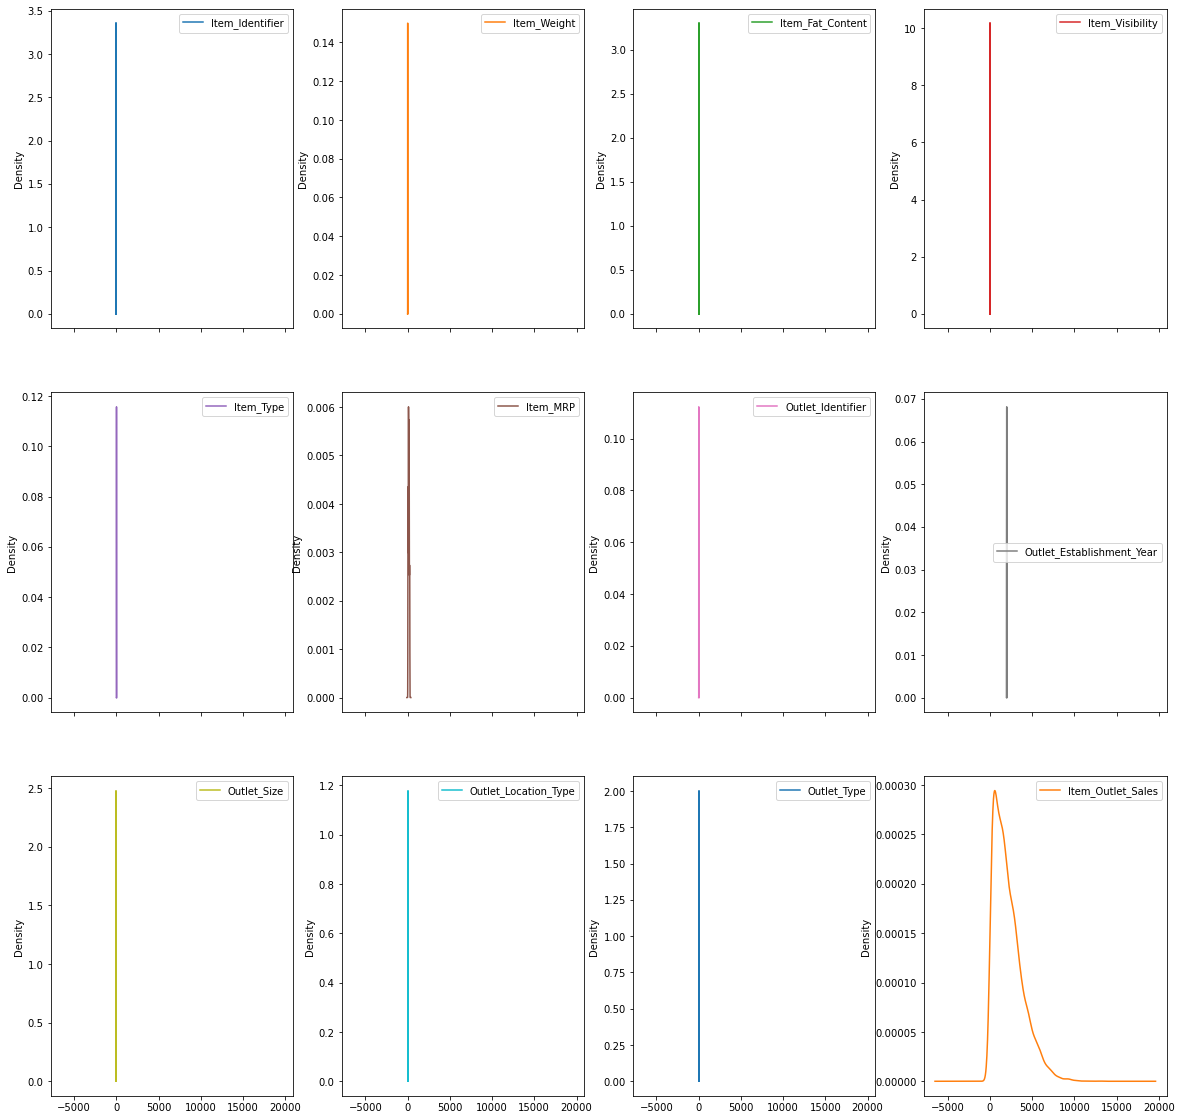

In [38]:
bmart_train.plot(kind='kde',subplots=True,layout=(3,4),figsize=(20,20))

In [39]:
bmart_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [40]:
df=bmart_train.copy()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,2,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [41]:
df.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1,inplace=True)
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


# Checking Outliers:

<function matplotlib.pyplot.show(close=None, block=None)>

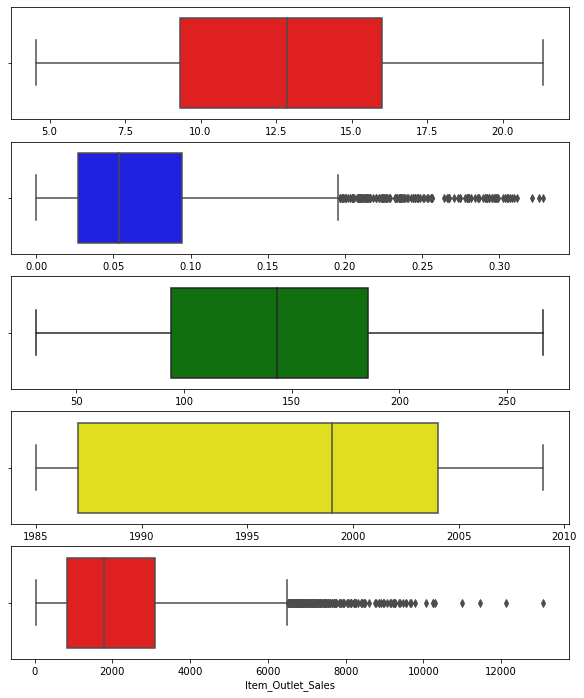

In [42]:
#checking for the outliers
plt.figure(figsize=(10,12))
plt.subplot(5,1,1)
sns.boxplot(x= df.Item_Weight,color='red')

plt.subplot(5,1,2)
sns.boxplot(x= df.Item_Visibility,color='blue')

plt.subplot(5,1,3)
sns.boxplot(x= df.Item_MRP,color='green')

plt.subplot(5,1,4)
sns.boxplot(x= df.Outlet_Establishment_Year,color='yellow')

plt.subplot(5,1,5)
sns.boxplot(x= df.Item_Outlet_Sales,color='red')

plt.show

# Checkingb skewness

Item_Weight = 0.09054551283289146


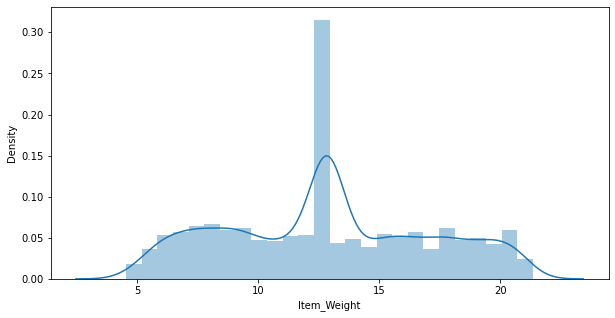

Item_Visibility = 1.16688513828559


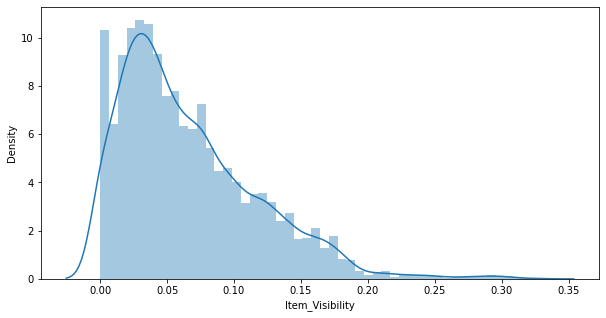

Item_MRP = 0.1271798803336854


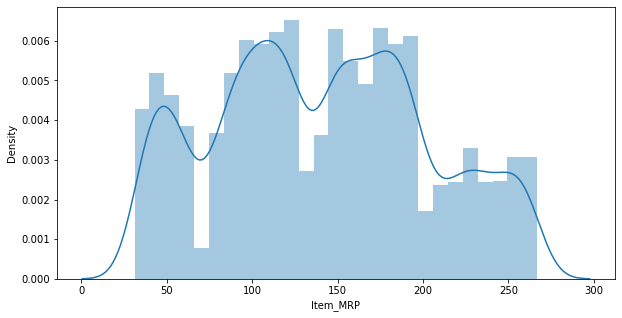

Outlet_Establishment_Year = -0.39657097595805835


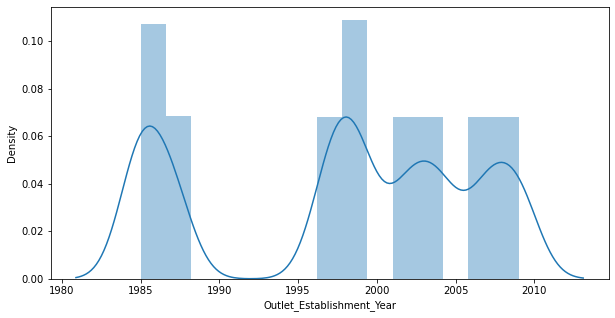

Item_Outlet_Sales = 1.177323353967637


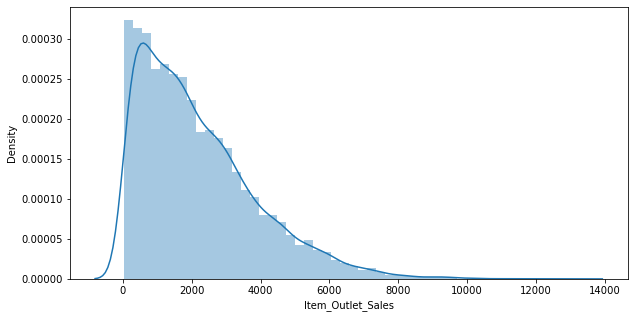

In [43]:
from scipy.stats import skew
for i in df:
    print(i, "=", skew(df[i]))
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])
    plt.show()

In [44]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

We Can see Item_visibilty and Item_Outlet_sales have skewness

# Checking Correlation:

In [45]:
bmart_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.063232,-0.166111,-0.037571,0.007456,0.032517,-0.009730,-0.008551,-0.000624,0.007661,0.001136,0.011236
Item_Weight,0.063232,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.166111,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.037571,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.007456,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.032517,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.009730,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.008551,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.000624,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.007661,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


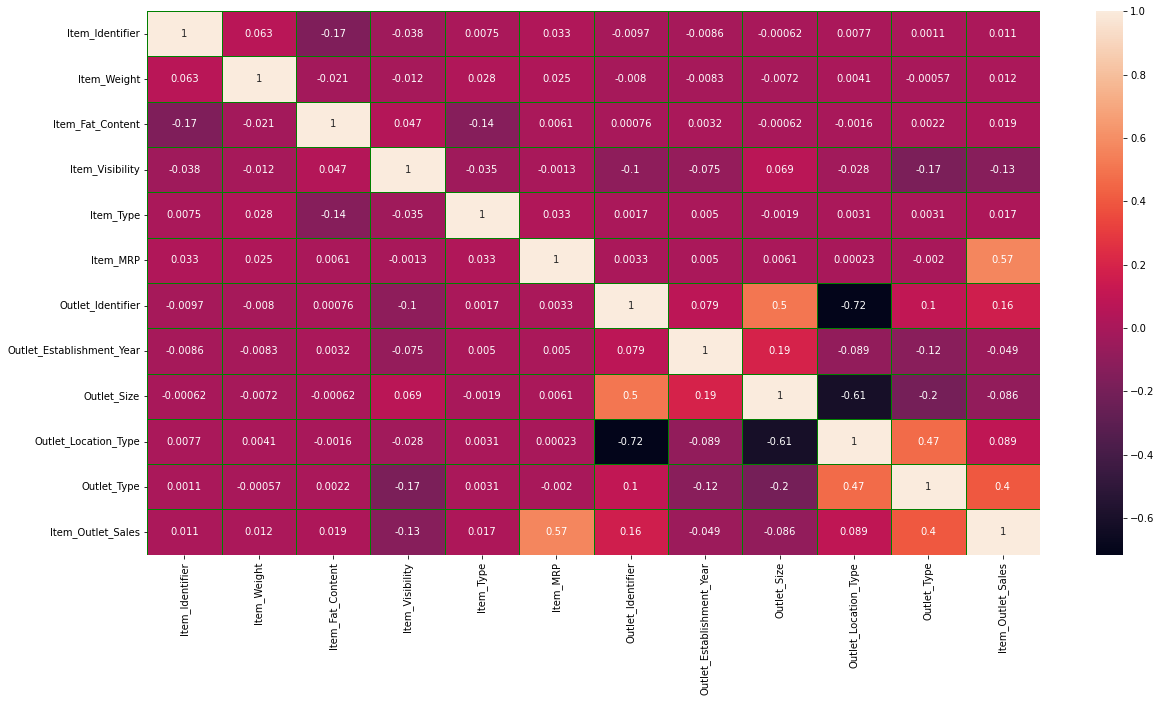

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(bmart_train.corr(), annot=True, linewidth=0.5, linecolor= "green")
plt.show()

# Checking Multicollinearity:

In [47]:
x = bmart_train.drop('Item_Outlet_Sales',axis=1)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,0,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,1,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,2,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,1,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,2,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,1,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [48]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [50]:
calc_vif(x)

,variables,VIF FACTOR
0,Item_Identifier,5.576391
1,Item_Weight,10.310760
2,Item_Fat_Content,1.623591
3,Item_Visibility,2.778684
4,Item_Type,4.037114
5,Item_MRP,6.144830
6,Outlet_Identifier,15.514009
7,Outlet_Establishment_Year,58.034710
8,Outlet_Size,7.958430
9,Outlet_Location_Type,16.597473


outlet_establishment year, outlet identifier outlet_location type have high vif factor. so we will drop outlet establishment year column. we will not drop other two as we will lose high amount of data

In [51]:
bmart_train.drop('Outlet_Establishment_Year',axis=1, inplace=True)

In [52]:
bmart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1,19.200,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,2,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


# Removing Outliers:

In [53]:
from scipy.stats import zscore
z= np.array(abs(zscore(bmart_train)))
z

array([[0.17979501, 0.84187169, 0.73814723, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [2.09528612, 1.64170589, 1.35474328, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.17979501, 1.09855449, 0.73814723, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.73569609, 0.53424315, 0.73814723, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.17979501, 1.33644372, 1.35474328, ..., 1.09156913, 1.00297245,
        0.19672492],
       [2.09528612, 0.45963367, 0.73814723, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [54]:
threshold= 3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [55]:
btrain=bmart_train[(z<3).all(axis=1)]
btrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1,19.200,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,2,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


In [56]:
bmart_train.shape

(8523, 11)

In [57]:
btrain.shape

(8338, 11)

In [58]:
data_loss=((8523-8338)/8523)*100
data_loss

2.170597207556025

it is considerable that 2% we have lost data

# Remving Skewness

In [59]:
btrain['Item_Visibility']= np.sqrt(btrain['Item_Visibility'])
skew(btrain['Item_Visibility'])

-0.24499053417367508

# Splitting the DataFrame in feature and target Column

In [60]:
x=btrain.iloc[:,:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.300,0,0.126678,4,249.8092,9,1,0,1
1,0,5.920,1,0.138846,14,48.2692,3,1,2,2
2,1,17.500,0,0.129461,10,141.6180,9,1,0,1
3,1,19.200,1,0.000000,6,182.0950,0,1,2,0
4,2,8.930,0,0.000000,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.238293,13,214.5218,1,0,2,1
8519,1,8.380,1,0.216754,0,108.1570,7,1,1,1
8520,2,10.600,0,0.187580,8,85.1224,6,2,1,1
8521,1,7.210,1,0.381078,13,103.1332,3,1,2,2


In [61]:
y=btrain.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

# Satandardization of data using Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.18252049, -0.8371775 , -0.73664489, ..., -0.27887393,
        -1.37034498, -0.25983859],
       [-2.09200079, -1.63203555,  1.35750619, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-0.18252049,  1.09117635, -0.73664489, ..., -0.27887393,
        -1.37034498, -0.25983859],
       ...,
       [ 1.72695982, -0.53146287, -0.73664489, ...,  1.38320672,
        -0.13564253, -0.25983859],
       [-0.18252049, -1.32867257,  1.35750619, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-2.09200079,  0.45623057, -0.73664489, ...,  1.38320672,
        -1.37034498, -0.25983859]])

In [64]:
x.mean()   #which is approximately zero

9.512393005423505e-17

In [65]:
x.std()    # which is  unity

1.0

# Training the data

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import sklearn
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [67]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random_state",i,"The model performs very well")
        print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
        print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
        print('\n')

At random_state 28 The model performs very well
At random state 28,the training accuracy is: 0.49877460545272434
At random state 28,the testing accuracy is: 0.4986442023868345


At random_state 44 The model performs very well
At random state 44,the training accuracy is: 0.4986827806968551
At random state 44,the testing accuracy is: 0.4989448623560656


At random_state 81 The model performs very well
At random state 81,the training accuracy is: 0.49858611711769807
At random state 81,the testing accuracy is: 0.4987834460631525


At random_state 140 The model performs very well
At random state 140,the training accuracy is: 0.49855638402345936
At random state 140,the testing accuracy is: 0.49936853005318316


At random_state 184 The model performs very well
At random state 184,the training accuracy is: 0.4986572409881602
At random state 184,the testing accuracy is: 0.49906675649440424


At random_state 205 The model performs very well
At random state 205,the training accuracy is: 0.4986830

we select random state=81 for best model performance

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=81)

# Training the data using various model

# 1.Linear Regression

In [69]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LR is', train_score)
print('The test accuracy of LR is', test_score)
print('\n')    

The training accuracy of LR is 0.49858611711769807
The test accuracy of LR is 0.4987834460631525




In [70]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 853.2788411331528
Mean squared error :  1222027.5967645706
Root mean squared error: 1105.453570605555


# 2.SVR

In [71]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.46480851531469614
0.08124380123619812
0.0559996070115909


kernel= rbf gives best accuracy score

In [72]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.0559996070115909
The test accuracy of SVR is 0.03782676376248606


In [73]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 1183.1796170817788
Mean squared error :  2345896.6754291756
Root mean squared error: 1531.6320300350133


# 3. Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.1534581284588582


In [75]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 1025.2369997601918
Mean squared error :  2063973.1882645446
Root mean squared error: 1436.6534683995806


# 4. Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.9363099460203437
The test accuracy of RF is 0.5463956028141395


In [77]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 767.3231638369305
Mean squared error :  1105943.3033904184
Root mean squared error: 1051.6383900326282


# 5. KNeighbors Regressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_train= knr.predict(x_train)
pred_test = knr.predict(x_test)
train_score = r2_score(y_train,pred_train)
test_score = r2_score(y_test,pred_test)
print('The training accuracy of KNR is', train_score)
print('The test accuracy of KNR is', test_score)

The training accuracy of KNR is 0.6677903840474224
The test accuracy of KNR is 0.49930581715695255


In [79]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 818.8196005515588
Mean squared error :  1220753.991798091
Root mean squared error: 1104.8773650492126


lets make a performance table for better view

In [80]:
Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','RFR','KNR'],
           'Trainig Score':[49.8,61.8,1.0,93.4,66.7],
           'Testing score':[49.8,57.7,16.5,55.3,49.9],
           'Root Mean squared error':[69.9,64.2,90.2,66.04,69.26]})

In [81]:
Performance_table

,Model,Trainig Score,Testing score,Root Mean squared error
0,LR,49.8,49.8,69.90
1,SVR,61.8,57.7,64.20
2,DTR,1.0,16.5,90.20
3,RFR,93.4,55.3,66.04
4,KNR,66.7,49.9,69.26


Hence Linear regression gives near about same results for traing and testing data and have less error

# Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

model=(lr,sv,dt,rf,knr)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.4966207184656291


Mean Accuracy of SVR()
0.054166701890906374


Mean Accuracy of DecisionTreeRegressor()
0.15122523311994887


Mean Accuracy of RandomForestRegressor()
0.5334865887893672


Mean Accuracy of KNeighborsRegressor()
0.49061634603570636




after cross validation we find random forest regressor works well  

# Normalization and HyperTuning

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [84]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.4987833937575922

In [85]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.49662076589138604

We got 0.49 score for training and 0.49 through cross validation from Lasso

As there is not much Hyperparmters for Linear regression we will fit our Final Model

In [86]:
Finalmod=LinearRegression(copy_X=True, fit_intercept= True, n_jobs=None, normalize=False)
Finalmod.fit(x_train,y_train)
pred_final=Finalmod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 49.87834460631525
Cross Val score 49.66207184656291


Therefore we got 49.8% accuracy score and 49% through cross validation

# Visualiszing the model

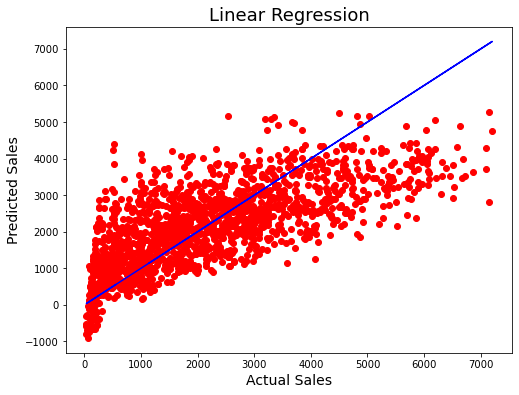

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The model is performing ok as we got only 49% accuracy

# Saving the model

In [88]:
import joblib
joblib.dump(Finalmod,'BigDataMart_sales.obj')

['BigDataMart_sales.obj']

# TEST Data

In [89]:
loaded_model=joblib.load('BigDataMart_sales.obj')

In [90]:
bmart_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
bmart_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [91]:
bmart_test.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
227,NCB06,17.6,Low Fat,0.082332,Health and Hygiene,160.392,OUT046,1997,Small,Tier 1,Supermarket Type1


In [92]:
bmart_test.shape

(5681, 11)

The test data has 5681 rows and 11 columns

In [93]:
bmart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


out of 11 columns 7 are object data type, 3 are float datatype and 1 is integer data type

# Now let's perform necessary the preprocessing as we have done on train data

# Null Values:

In [94]:
bmart_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

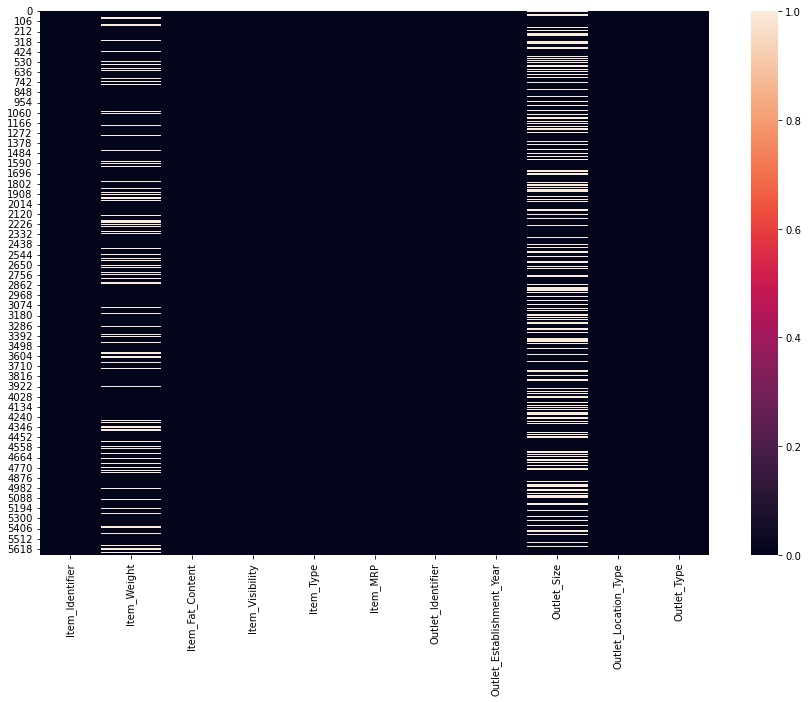

In [95]:
sns.heatmap(bmart_test.isnull())

In [96]:
bmart_test['Item_Weight'] = bmart_test['Item_Weight'].fillna((bmart_test['Item_Weight'].mean()))

In [97]:
# for categorical columns using Simple Imputer for filling missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

bmart_test['Outlet_Size']= imp.fit_transform(bmart_test['Outlet_Size'].values.reshape(-1,1))

bmart_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [98]:
bmart_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Hence we have removed all null values

# Checking duplicates:

In [99]:
bmart_test.duplicated().sum()

0

no duplicates found

# Checking unique values and value counts

In [100]:
for i in bmart_test:
    print(i)
    print(bmart_test[i].value_counts())
    print("unique values are",bmart_test[i].nunique())
    print("\n")

Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64
unique values are 1543


Item_Weight
12.695633    976
10.500000     57
17.600000     53
15.600000     48
20.250000     47
            ... 
6.980000       1
6.320000       1
5.465000       1
5.945000       1
7.670000       1
Name: Item_Weight, Length: 411, dtype: int64
unique values are 411


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64
unique values are 5


Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: Item_Visibility, Length: 5277, dtype: int64
unique values are 5277


Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638


we have found item identifier can be chnaged and item fat content also can be chnaged . same as we have done in train data

In [101]:
bmart_test['Item_Fat_Content'] = bmart_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})

In [102]:
bmart_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [103]:
bmart_test['Item_Identifier'] = bmart_test['Item_Identifier'].astype(str).str[:2]
bmart_test['Item_Identifier'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier, dtype: int64

# Using Label Encoder:

In [104]:
le = LabelEncoder()

In [105]:
list2 =['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list2:
    bmart_test[val]= le.fit_transform(bmart_test[val].astype(str))

bmart_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,2,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,1,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,1,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,2,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,1,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


# Multicollinearity:

In [106]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [108]:
#as we do not have target column in test data
x=bmart_test

In [109]:
calc_vif(x)

,variables,VIF FACTOR
0,Item_Identifier,5.645367
1,Item_Weight,10.024628
2,Item_Fat_Content,1.638289
3,Item_Visibility,2.775726
4,Item_Type,4.063295
5,Item_MRP,6.246880
6,Outlet_Identifier,15.517510
7,Outlet_Establishment_Year,57.987814
8,Outlet_Size,7.969028
9,Outlet_Location_Type,16.608853


In [110]:
#dropping Outlet_Establishment_Year column
x.drop('Outlet_Establishment_Year',axis=1,inplace =True)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,20.750000,0,0.007565,13,107.8622,9,1,0,1
1,1,8.300000,1,0.038428,4,87.3198,2,1,1,1
2,2,14.600000,0,0.099575,11,241.7538,0,1,2,0
3,1,7.315000,0,0.015388,13,155.0340,2,1,1,1
4,1,12.695633,1,0.118599,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.013496,13,141.3154,8,2,0,1
5677,1,7.600000,1,0.142991,15,169.1448,3,1,2,2
5678,2,10.000000,0,0.073529,8,118.7440,7,1,1,1
5679,1,15.300000,1,0.000000,3,214.6218,2,1,1,1


# Removing Outliers

In [111]:
from scipy.stats import zscore
z= np.array(abs(zscore(x)))
z

array([[0.19187262, 1.89745979, 0.74081066, ..., 0.28473712, 1.369215  ,
        0.25276858],
       [0.19187262, 1.03552991, 1.34987258, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [1.72381871, 0.44863355, 0.74081066, ..., 0.28473712, 1.0915602 ,
        1.50799439],
       ...,
       [1.72381871, 0.63504136, 0.74081066, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.19187262, 0.6135406 , 1.34987258, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.19187262, 0.75283211, 1.34987258, ..., 0.28473712, 0.1388274 ,
        0.25276858]])

In [112]:
threshold= 3
print(np.where(z>3))

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))


In [113]:
btest=x[(z<3).all(axis=1)]
btest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,20.750000,0,0.007565,13,107.8622,9,1,0,1
1,1,8.300000,1,0.038428,4,87.3198,2,1,1,1
2,2,14.600000,0,0.099575,11,241.7538,0,1,2,0
3,1,7.315000,0,0.015388,13,155.0340,2,1,1,1
4,1,12.695633,1,0.118599,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.013496,13,141.3154,8,2,0,1
5677,1,7.600000,1,0.142991,15,169.1448,3,1,2,2
5678,2,10.000000,0,0.073529,8,118.7440,7,1,1,1
5679,1,15.300000,1,0.000000,3,214.6218,2,1,1,1


In [114]:
bmart_test.shape

(5681, 10)

In [115]:
btest.shape

(5600, 10)

In [116]:
data_loss= ((5681-5600)/5681)*100
data_loss

1.425805315965499

# REmoving Skewness:

In [117]:
df1=btest.copy()      # for removing outliers and skewness lets form a data of columns which are not label encoded
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,20.750000,0,0.007565,13,107.8622,9,1,0,1
1,1,8.300000,1,0.038428,4,87.3198,2,1,1,1
2,2,14.600000,0,0.099575,11,241.7538,0,1,2,0
3,1,7.315000,0,0.015388,13,155.0340,2,1,1,1
4,1,12.695633,1,0.118599,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.013496,13,141.3154,8,2,0,1
5677,1,7.600000,1,0.142991,15,169.1448,3,1,2,2
5678,2,10.000000,0,0.073529,8,118.7440,7,1,1,1
5679,1,15.300000,1,0.000000,3,214.6218,2,1,1,1


In [118]:
df1.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1,inplace=True)
df1

,Item_Weight,Item_Visibility,Item_MRP
0,20.750000,0.007565,107.8622
1,8.300000,0.038428,87.3198
2,14.600000,0.099575,241.7538
3,7.315000,0.015388,155.0340
4,12.695633,0.118599,234.2300
...,...,...,...
5676,10.500000,0.013496,141.3154
5677,7.600000,0.142991,169.1448
5678,10.000000,0.073529,118.7440
5679,15.300000,0.000000,214.6218


In [119]:
df1.skew()

Item_Weight        0.140901
Item_Visibility    0.787861
Item_MRP           0.133061
dtype: float64

In [120]:
btest['Item_Visibility']= np.sqrt(btest['Item_Visibility'])
skew(btest['Item_Visibility'])

-0.28326945617347293

In [121]:
btest.skew()

Item_Identifier         0.119481
Item_Weight             0.140901
Item_Fat_Content        0.616007
Item_Visibility        -0.283345
Item_Type               0.091394
Item_MRP                0.133061
Outlet_Identifier      -0.069734
Outlet_Size            -0.082542
Outlet_Location_Type   -0.212992
Outlet_Type             0.953152
dtype: float64

# Standardization using standard scaler

In [122]:
sc=StandardScaler()
x1=sc.fit_transform(btest)
x1

array([[-0.19260588,  1.88884016, -0.73841307, ..., -0.2761756 ,
        -1.37786207, -0.27721336],
       [-0.19260588, -1.03277868,  1.35425555, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [ 1.7197929 ,  0.44563085, -0.73841307, ..., -0.2761756 ,
         1.09284802, -1.54447443],
       ...,
       [ 1.7197929 , -0.63384277, -0.73841307, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [-0.19260588,  0.60989858,  1.35425555, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [-0.19260588, -0.75117686,  1.35425555, ..., -0.2761756 ,
        -0.14250703, -0.27721336]])

In [123]:
#forming df
x1=pd.DataFrame(x1,columns=btest.columns)

In [124]:
x1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.192606,1.888840,-0.738413,-1.393223,1.363909,-0.538563,1.498198,-0.276176,-1.377862,-0.277213
1,-0.192606,-1.032779,1.354256,-0.324257,-0.767463,-0.871149,-0.975450,-0.276176,-0.142507,-0.277213
2,1.719793,0.445631,-0.738413,0.847352,0.890271,1.629171,-1.682207,-0.276176,1.092848,-1.544474
3,-0.192606,-1.263927,-0.738413,-1.029817,1.363909,0.225158,-0.975450,-0.276176,-0.142507,-0.277213
4,-0.192606,-0.001263,1.354256,1.129926,-0.767463,1.507359,0.084685,-0.276176,1.092848,2.257309
...,...,...,...,...,...,...,...,...,...,...
5595,-0.192606,-0.516509,1.354256,-1.107016,1.363909,0.003051,1.144820,1.390401,-1.377862,-0.277213
5596,-0.192606,-1.197046,1.354256,1.460837,1.837547,0.453615,-0.622072,-0.276176,1.092848,0.990048
5597,1.719793,-0.633843,-0.738413,0.412199,0.179813,-0.362385,0.791441,-0.276176,-0.142507,-0.277213
5598,-0.192606,0.609899,1.354256,-2.245780,-1.004282,1.189898,-0.975450,-0.276176,-0.142507,-0.277213


# Passsing test data to our model

In [125]:
Test_pred=loaded_model.predict(x1)

In [126]:
Test=pd.DataFrame(data=Test_pred)
Test

,0
0,2064.558018
1,1108.241671
2,2151.092458
3,2078.446660
4,4779.160425
...,...
5595,2192.340488
5596,2881.383840
5597,1838.442241
5598,3062.238105


In [129]:
Test_final1=pd.concat([x1,Test],axis=1)

In [130]:
Test_final1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,0
0,-0.192606,1.888840,-0.738413,-1.393223,1.363909,-0.538563,1.498198,-0.276176,-1.377862,-0.277213,2064.558018
1,-0.192606,-1.032779,1.354256,-0.324257,-0.767463,-0.871149,-0.975450,-0.276176,-0.142507,-0.277213,1108.241671
2,1.719793,0.445631,-0.738413,0.847352,0.890271,1.629171,-1.682207,-0.276176,1.092848,-1.544474,2151.092458
3,-0.192606,-1.263927,-0.738413,-1.029817,1.363909,0.225158,-0.975450,-0.276176,-0.142507,-0.277213,2078.446660
4,-0.192606,-0.001263,1.354256,1.129926,-0.767463,1.507359,0.084685,-0.276176,1.092848,2.257309,4779.160425
...,...,...,...,...,...,...,...,...,...,...,...
5595,-0.192606,-0.516509,1.354256,-1.107016,1.363909,0.003051,1.144820,1.390401,-1.377862,-0.277213,2192.340488
5596,-0.192606,-1.197046,1.354256,1.460837,1.837547,0.453615,-0.622072,-0.276176,1.092848,0.990048,2881.383840
5597,1.719793,-0.633843,-0.738413,0.412199,0.179813,-0.362385,0.791441,-0.276176,-0.142507,-0.277213,1838.442241
5598,-0.192606,0.609899,1.354256,-2.245780,-1.004282,1.189898,-0.975450,-0.276176,-0.142507,-0.277213,3062.238105


In [131]:
Test_final1.rename(columns={0: 'Item_Outlet_Sales'}, inplace=True)
Test_final1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.192606,1.888840,-0.738413,-1.393223,1.363909,-0.538563,1.498198,-0.276176,-1.377862,-0.277213,2064.558018
1,-0.192606,-1.032779,1.354256,-0.324257,-0.767463,-0.871149,-0.975450,-0.276176,-0.142507,-0.277213,1108.241671
2,1.719793,0.445631,-0.738413,0.847352,0.890271,1.629171,-1.682207,-0.276176,1.092848,-1.544474,2151.092458
3,-0.192606,-1.263927,-0.738413,-1.029817,1.363909,0.225158,-0.975450,-0.276176,-0.142507,-0.277213,2078.446660
4,-0.192606,-0.001263,1.354256,1.129926,-0.767463,1.507359,0.084685,-0.276176,1.092848,2.257309,4779.160425
...,...,...,...,...,...,...,...,...,...,...,...
5595,-0.192606,-0.516509,1.354256,-1.107016,1.363909,0.003051,1.144820,1.390401,-1.377862,-0.277213,2192.340488
5596,-0.192606,-1.197046,1.354256,1.460837,1.837547,0.453615,-0.622072,-0.276176,1.092848,0.990048,2881.383840
5597,1.719793,-0.633843,-0.738413,0.412199,0.179813,-0.362385,0.791441,-0.276176,-0.142507,-0.277213,1838.442241
5598,-0.192606,0.609899,1.354256,-2.245780,-1.004282,1.189898,-0.975450,-0.276176,-0.142507,-0.277213,3062.238105


In [132]:
Test_final1['Item_Outlet_Sales'].isnull().sum()

0